In [2]:
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
# 16 Oct 2023: gdal must be imported first, and then rasterio can be imported
from osgeo import gdal
import rasterio as rio
import seaborn as sns

In [3]:
# Set some directories. Here we use absolute directories. 
cwd = 'c:\\Users\\m1865\\Desktop\\Ticino'
cwd_Field = cwd + '\\FieldData'
cwd_PRISMA = cwd + "\\PRISMA Raster Raw\\Merged"
cwd_PRISMA_Mask = cwd + "\\PRISMA Raster Mask"
cwd_PRISMA_Indices = cwd + "\\PRISMA Classification Indices"
cwd_PRISMA_Results = cwd + "\\ResultsPRISMA"

In [4]:
folder_Names = os.listdir(cwd_PRISMA_Results)

In [5]:
raster_Names = []
raster_Indices_Names = []
for name in folder_Names:
    if "StackedIndices" in name:
        raster_Indices_Names.append(name)
    else:
        raster_Names.append(name)
raster_Indices_Names

['PRS_L2D_STD_20220611_20220710_NS_mosaic_crop_smooth_v2i_StackedIndices',
 'PRS_L2D_STD_20220906_20220911_NS_mosaic_crop_smooth_v2i_new_StackedIndices',
 'PRS_L2D_STD_20220906_20220911_NS_mosaic_crop_smooth_v2i_StackedIndices']

In [6]:
raster = rio.open(cwd_PRISMA_Results + "\\" + raster_Indices_Names[0] + "\\" + raster_Indices_Names[0])

In [7]:
raster.count

40

In [8]:
# Create a dataframe for these bands
df = pd.DataFrame()
for i in range(raster.count):
    temp_band = raster.read(i+1)
    # temp_band = temp_band[temp_band != np.nan]
    temp_array = temp_band.reshape(-1)
    temp_bandname = raster.tags(ns='ENVI')['band_names'].split(',')[i]
    if temp_bandname[0] == '{':
        temp_bandname = temp_bandname.split('{')[1]
    if temp_bandname[-1] == '}': 
        temp_bandname = temp_bandname.split('}')[0]
    df[temp_bandname] = temp_array
df

,ARI1,ARI2,ARVI,BAI,BAIS2,CCCI,CHL_RE,CRI1,CRI2,EVI,...,PSRI,PSRI_NIR,RE_NDVI,RE_NDWI,S2REP,SAVI,SIPI,SR,CR_SWIR,CR_RE
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2291050,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2291051,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2291052,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2291053,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
df_corr = df.corr()

<Axes: title={'center': 'Spectral Indices Correlation (0-1) for PRISMA Images'}>

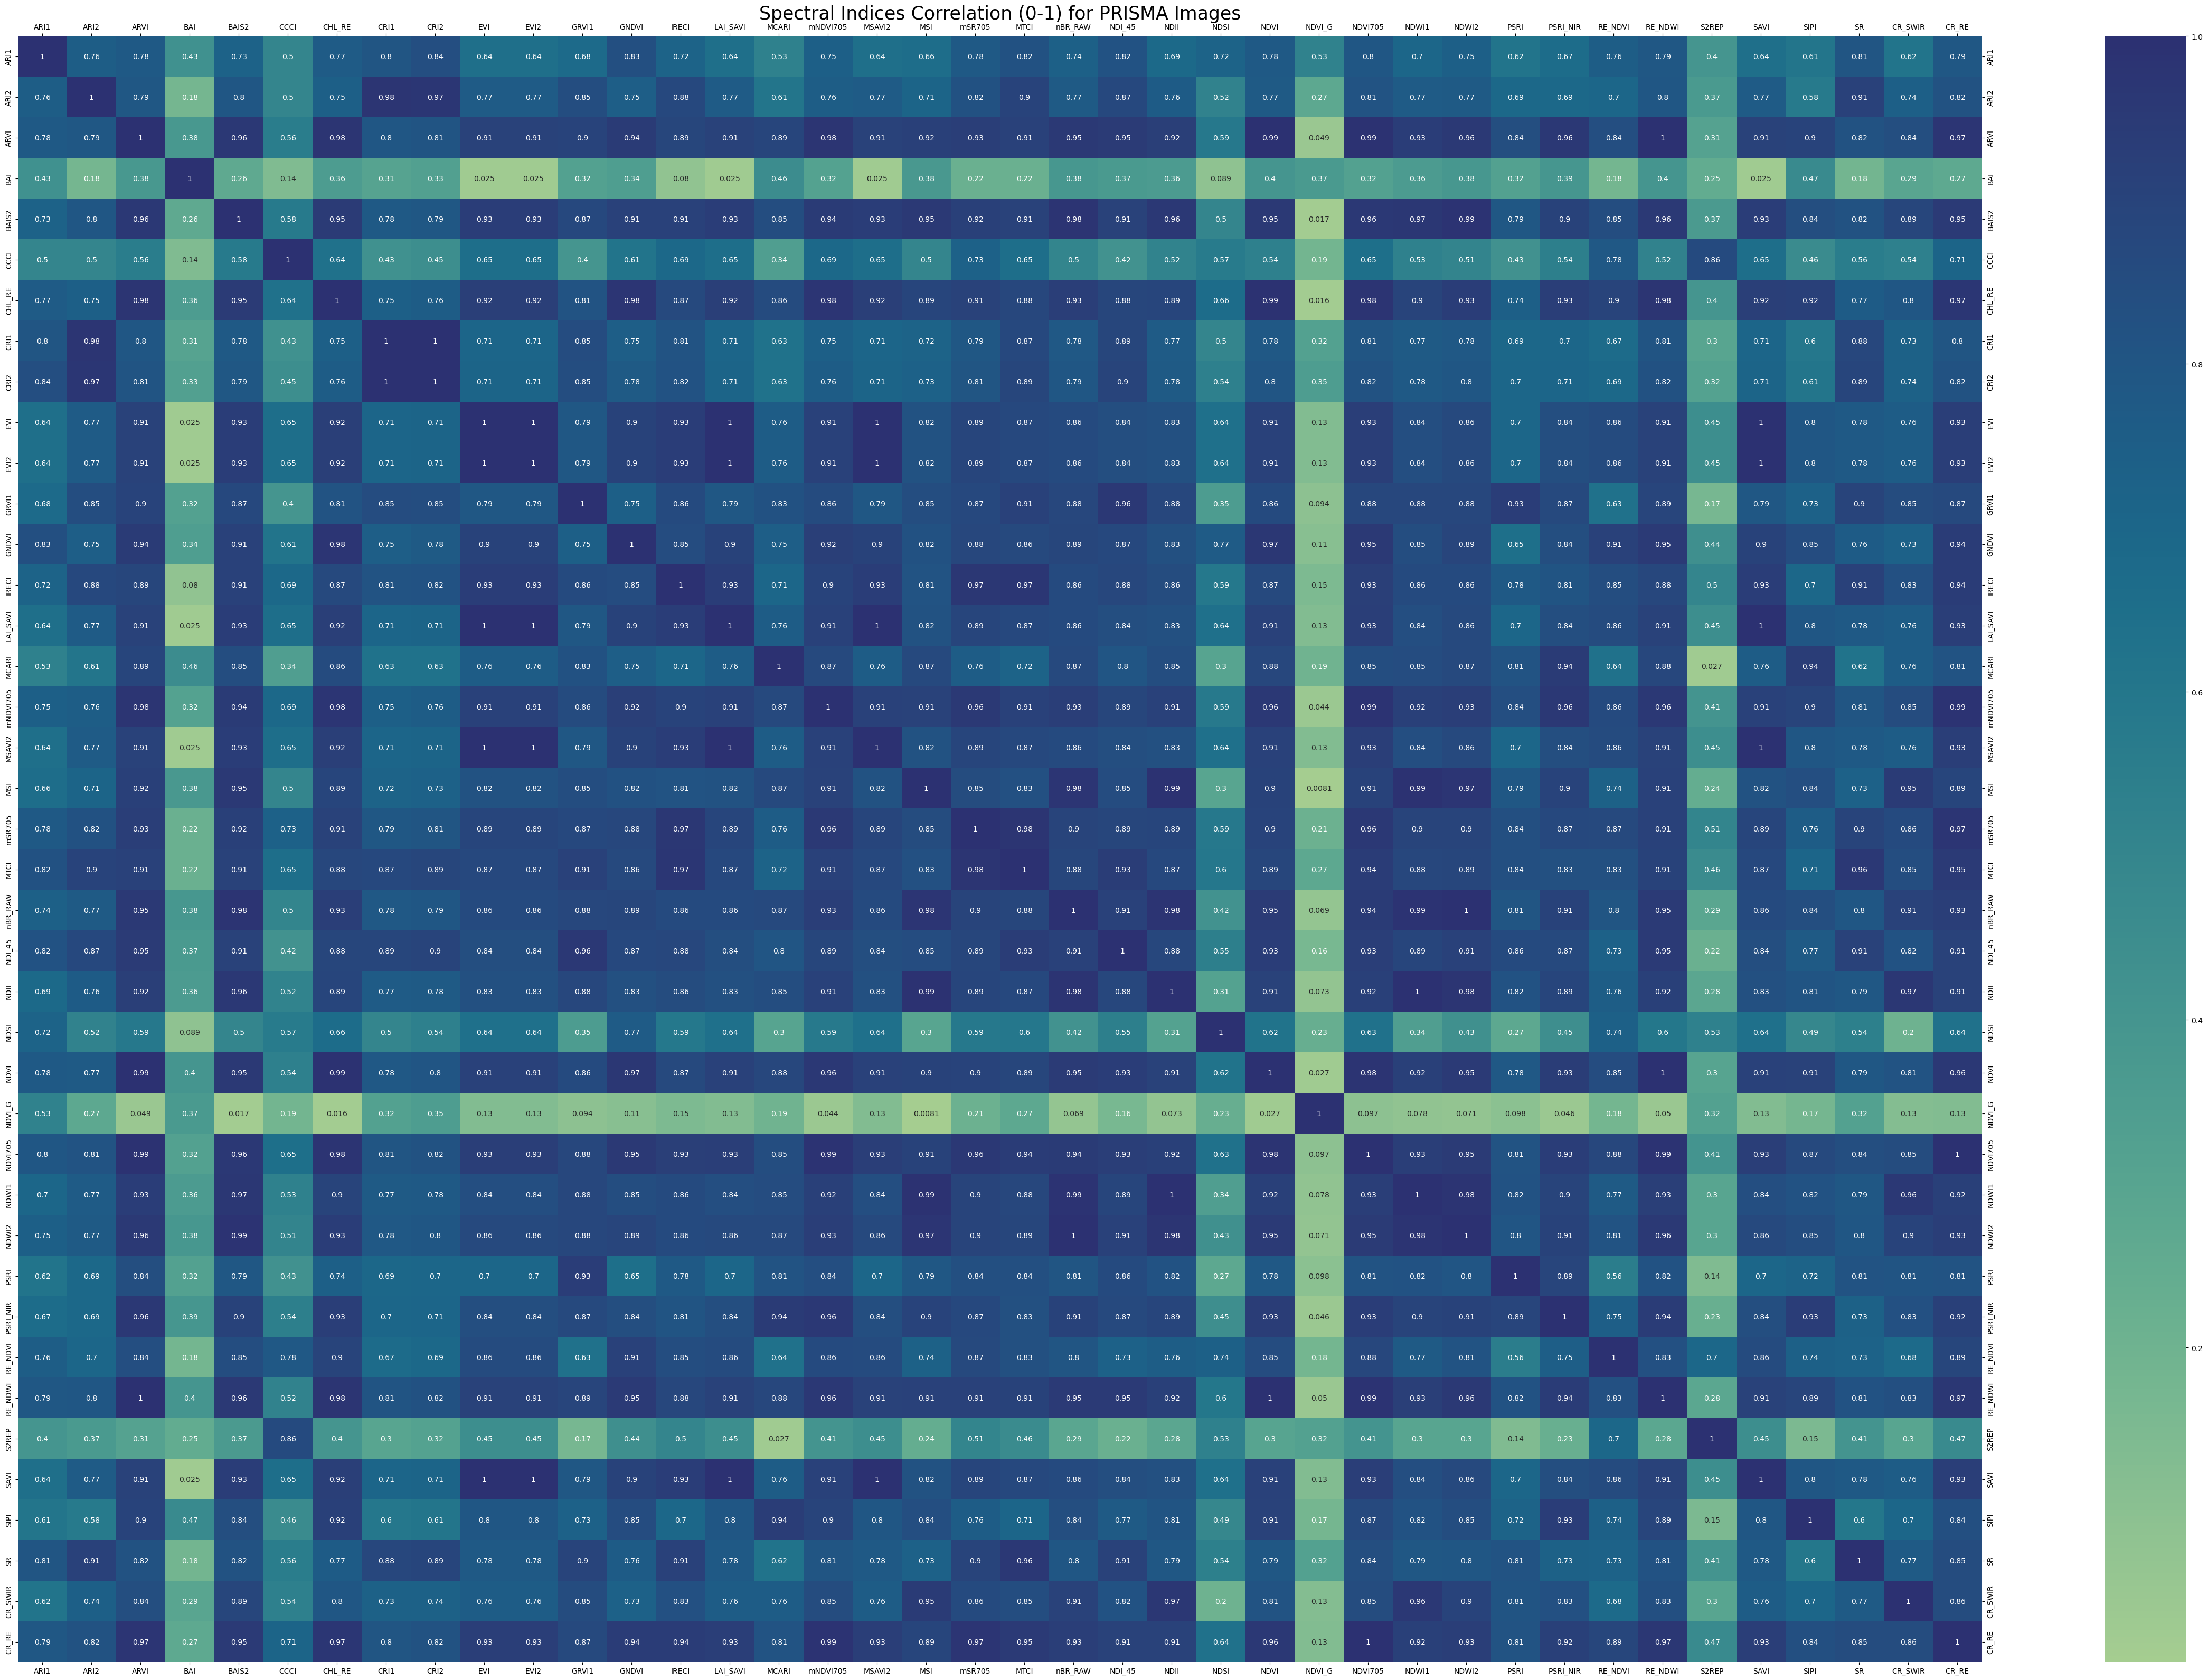

In [9]:
# Set figure size
plt.figure(figsize=(60,40))
# Set tick labels on all the four sides
plt.tick_params(axis='both', which='major', top = True, labeltop=True, right = True, labelright = True)
# Set the title
plt.title("Spectral Indices Correlation (0-1) for PRISMA Images", fontsize = 25)
# Plot the heatmap! 
sns.heatmap(df_corr.abs(), annot=True, cmap='crest')

In [9]:
band_Names = list(df.columns)
band_Names

['ARI1',
 'ARI2',
 'ARVI',
 'BAI',
 'BAIS2',
 'CCCI',
 'CHL_RE',
 'CRI1',
 'CRI2',
 'EVI',
 'EVI2',
 'GRVI1',
 'GNDVI',
 'IRECI',
 'LAI_SAVI',
 'MCARI',
 'mNDVI705',
 'MSAVI2',
 'MSI',
 'mSR705',
 'MTCI',
 'nBR_RAW',
 'NDI_45',
 'NDII',
 'NDSI',
 'NDVI',
 'NDVI_G',
 'NDVI705',
 'NDWI1',
 'NDWI2',
 'PSRI',
 'PSRI_NIR',
 'RE_NDVI',
 'RE_NDWI',
 'S2REP',
 'SAVI',
 'SIPI',
 'SR',
 'CR_SWIR',
 'CR_RE']

In [10]:
band_Names.index('NDVI')

25

In [11]:
band_Names.index('MCARI')

15

In [12]:
band_Names.index('CCCI')

5